# Mean_Shift(LDA 차원 축소법 사용)
- k-평균: 소속된 데이터의 평균 위치로 중심 이동
- 평균 이동: 밀도가 가장 높은 곳으로 중심 이동
    - 확률 밀도 함수가 피크인 점을 중심으로 설정
    - 확률 밀도 함수를 추정하기 위해 KDE(Kernel Density Estimation) 사용
- bandwidth가 작을수록 군집 개수 증가
    - Overfitting 가능성
- bandwidth가 클수록 군집 개수 감소
    - Underfitting 가능성

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
hw = pd.read_csv(r'C:\Users\arceu\Desktop\homework\hw.csv')
hw_target = hw['target']
hw_features = hw.drop('target', axis=1, inplace=False)

In [3]:
hw_scaled = StandardScaler().fit_transform(hw_features)

In [4]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=2.4) # bandwidth를 2.4로 설정해보니 cluster가 두 개 형성된다
cluster_labels = meanshift.fit_predict(hw_features)
print(np.unique(cluster_labels))

[0 1]


In [5]:
df = pd.DataFrame(data=hw_features, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
df.head()

,f1,f2,f3,f4,f5
0,1.030972,-0.449614,0.581358,1.480586,2.511557
1,0.902691,0.372013,1.274705,0.530678,1.433370
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447
3,1.908221,0.360373,2.268593,1.547848,3.456069
4,0.877666,0.153999,1.031665,0.723666,1.601332


In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(hw_scaled, hw_target)
hw_lda = lda.transform(hw_scaled)

In [7]:
df['cluster'] = cluster_labels
df['component1'] = hw_lda[:, 0]
df['component2'] = hw_lda[:, 1]
df.head()

,f1,f2,f3,f4,f5,cluster,component1,component2
0,1.030972,-0.449614,0.581358,1.480586,2.511557,0,2.243355,0.455772
1,0.902691,0.372013,1.274705,0.530678,1.433370,0,-0.034032,-0.672026
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447,1,-2.181906,0.595953
3,1.908221,0.360373,2.268593,1.547848,3.456069,0,0.712330,-1.862497
4,0.877666,0.153999,1.031665,0.723666,1.601332,0,0.528237,-0.301777


In [8]:
df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 'd']

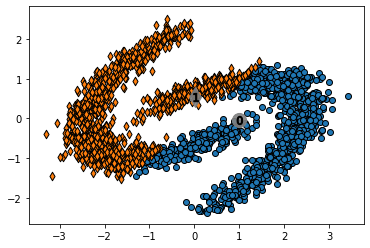

In [9]:
for label in unique_labels:
    label_cluster = df[df['meanshift_label'] == label]
    center = centers[label]
    plt.scatter(x=label_cluster['component1'], y=label_cluster['component2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k', marker='$%d$' %label)
plt.show()